In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import IPython.display as ipd
import librosa
import librosa.display
import os

In [2]:
AUDIO_PATH = '../Proiect_FMA/fma/data/fma_medium/'
IMAGE_PATH = '../Proiect_FMA/fma/data/fma_medium_image/'
META_PATH = '../Proiect_FMA/fma/data/fma_metadata/'

plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
AUDIO_PATH = '../Proiect_FMA/fma/data/fma_small/'
IMAGE_PATH = '../Proiect_FMA/fma/data/fma_small_image/'
META_PATH = '../Proiect_FMA/fma/data/fma_metadata/'

plt.rcParams['figure.figsize'] = (17, 5)

In [3]:
tracks = pd.read_csv(META_PATH + 'tracks.csv', index_col=0, header=[0, 1])
tracks

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   
...           ...                  ...                  ...      ...   
155316          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155317          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155318          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155319          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155320          0  2017-03-26 16:22:18  2017-03-26 00:00:00      NaN   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
2                4      1                                            <p></p>   
3                4      1                                            <p></p>   
5                4      1                                            <p></p>   
10               4      6                                                NaN   
20               2      4          <p> "spiritual songs" from Nicky Cook</p>   
...            ...    ...                                                ...   
155316           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155317           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155318           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155319           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155320           1  22906                                                NaN   

                               \
         listens     producer   
track_id                        
2           6073          NaN   
3           6073          NaN   
5           6073          NaN   
10         47632          NaN   
20          2710          NaN   
...          ...          ...   
155316      1506  Monty Hall    
155317      1506  Monty Hall    
155318      1506  Monty Hall    
155319      1506  Monty Hall    
155320      7481          NaN   

                                                             ...       track  \
                                                       tags  ... information   
track_id                                                     ...               
2                                                        []  ...         NaN   
3                                                        []  ...         NaN   
5                                                        []  ...         NaN   
10                                                       []  ...         NaN   
20                                                       []  ...         NaN   
...                                                     ...  ...         ...   
155316                                                   []  ...         NaN   
155317                                                   []  ...         NaN   
155318                                                   []  ...         NaN   
155319                                                   []  ...         NaN   
155320    ['ballad', 'epic', 'rockabilly', 'curse', 'hex...  ...         NaN   

                                 \
         interest language_code   
track_id                          
2            4656            en   
3            1470            en   
5            1933            en   
10          54881            en   
20            978            en   
...           ... 

In [4]:
COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
for column in COLUMNS:
    tracks[column] = tracks[column].map(ast.literal_eval)

COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
            ('album', 'date_created'), ('album', 'date_released'),
            ('artist', 'date_created'), ('artist', 'active_year_begin'),
            ('artist', 'active_year_end')]
for column in COLUMNS:
    tracks[column] = pd.to_datetime(tracks[column])

SUBSETS = ('small', 'medium', 'large')
try:
    tracks['set', 'subset'] = tracks['set', 'subset'].astype(
            'category', categories=SUBSETS, ordered=True)
except (ValueError, TypeError):
    tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                pd.CategoricalDtype(categories=SUBSETS, ordered=True))

COLUMNS = [('track', 'genre_top'), ('track', 'license'),
            ('album', 'type'), ('album', 'information'),
            ('artist', 'bio')]
for column in COLUMNS:
    tracks[column] = tracks[column].astype('category')

tracks

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4      6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2      4   
...           ...                 ...           ...      ...       ...    ...   
155316          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155317          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155318          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155319          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155320          0 2017-03-26 16:22:18    2017-03-26      NaN         1  22906   

                                                                     \
                                                information listens   
track_id                                                              
2                                                   <p></p>    6073   
3                                                   <p></p>    6073   
5                                                   <p></p>    6073   
10                                                      NaN   47632   
20                <p> "spiritual songs" from Nicky Cook</p>    2710   
...                                                     ...     ...   
155316    <p>A live performance at Monty Hall on Feb 17,...    1506   
155317    <p>A live performance at Monty Hall on Feb 17,...    1506   
155318    <p>A live performance at Monty Hall on Feb 17,...    1506   
155319    <p>A live performance at Monty Hall on Feb 17,...    1506   
155320                                                  NaN    7481   

                                                                          ...  \
             producer                                               tags  ...   
track_id                                                                  ...   
2                 NaN                                                 []  ...   
3                 NaN                                                 []  ...   
5                 NaN                                                 []  ...   
10                NaN                                                 []  ...   
20                NaN                                                 []  ...   
...               ...                                                ...  ...   
155316    Monty Hall                                                  []  ...   
155317    Monty Hall                                                  []  ...   
155318    Monty Hall                                                  []  ...   
155319    Monty Hall                                                  []  ...   
155320            NaN  [ballad, epic, rockabilly, curse, hex, hard ro...  ...   

               track                         \
         information interest language_code   
track_id                                      
2                NaN     4656            en   
3                NaN     1470            en   
5                NaN     1933            en   
10               NaN    54881            en   
20               NaN      978            en   
...              ...      ...           ...   
155316           NaN      122           NaN   
155317           NaN      194           NaN   
155318           NaN      214           NaN   
155319           NaN      336           NaN   
155320           NaN      972           NaN   

                                                                              \
        

In [31]:
# Select medium subset
medium = tracks[tracks['set', 'subset'] <= 'medium']
medium.shape

(25000, 52)

In [5]:
# Select small subset
small = tracks[tracks['set', 'subset'] <= 'small']
small.shape

(8000, 52)

In [8]:
genres = pd.read_csv(META_PATH + 'genres.csv')
genres

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
...,...,...,...,...,...
158,1032,60,102,Turkish,2
159,1060,30,46,Tango,2
160,1156,26,130,Fado,2
161,1193,72,763,Christmas,38


In [9]:
SPLITS = ['training', 'validation', 'test']
counts = [sum((tracks['set', 'split'] == split) & (tracks['set', 'subset'] <= 'medium')) for split in SPLITS]
print('{:7d} {:7d} {:7d}'.format(*counts))

  19922    2505    2573


In [6]:
SPLITS = ['training', 'validation', 'test']
counts = [sum((tracks['set', 'split'] == split) & (tracks['set', 'subset'] <= 'small')) for split in SPLITS]
print('{:7d} {:7d} {:7d}'.format(*counts))

   6400     800     800


In [16]:
subset = tracks['set', 'subset'] <= 'medium'

d = genres.reset_index().set_index('title')
d = d.loc[tracks.loc[subset, ('track', 'genre_top')].unique()]

for split in SPLITS:
    b = tracks['set', 'split'] == split
    d['#' + split] = tracks.loc[subset & b, ('track', 'genre_top')].value_counts()

d['val_ratio'] = d['#training'] / d['#validation']
d['test_ratio'] = d['#training'] / d['#test']

ipd.display(d.sort_values('#training', ascending=False))

,index,genre_id,#tracks,parent,top_level,#training,#validation,#test,val_ratio,test_ratio
title,,,,,,,,,,
Rock,11,12,32923,0,12,5681,711,711,7.990155,7.990155
Electronic,14,15,34413,0,15,5050,632,632,7.990506,7.990506
Experimental,31,38,38154,0,38,1801,225,225,8.004444,8.004444
Hip-Hop,20,21,8389,0,21,1761,220,220,8.004545,8.004545
Folk,16,17,12706,0,17,1215,152,152,7.993421,7.993421
Instrumental,162,1235,14938,0,1235,1045,131,174,7.977099,6.005747
Pop,9,10,13845,0,10,945,122,119,7.745902,7.941176
International,1,2,5271,0,2,814,102,102,7.980392,7.980392
Classical,4,5,4106,0,5,495,62,62,7.983871,7.983871


In [9]:
subset = tracks['set', 'subset'] <= 'small'

d = genres.reset_index().set_index('title')
d = d.loc[tracks.loc[subset, ('track', 'genre_top')].unique()]

for split in SPLITS:
    b = tracks['set', 'split'] == split
    d['#' + split] = tracks.loc[subset & b, ('track', 'genre_top')].value_counts()

d['val_ratio'] = d['#training'] / d['#validation']
d['test_ratio'] = d['#training'] / d['#test']

ipd.display(d.sort_values('#training', ascending=False))

,index,genre_id,#tracks,parent,top_level,#training,#validation,#test,val_ratio,test_ratio
title,,,,,,,,,,
Hip-Hop,20,21,8389,0,21,800,100,100,8.0,8.0
Pop,9,10,13845,0,10,800,100,100,8.0,8.0
Folk,16,17,12706,0,17,800,100,100,8.0,8.0
Experimental,31,38,38154,0,38,800,100,100,8.0,8.0
Rock,11,12,32923,0,12,800,100,100,8.0,8.0
International,1,2,5271,0,2,800,100,100,8.0,8.0
Electronic,14,15,34413,0,15,800,100,100,8.0,8.0
Instrumental,162,1235,14938,0,1235,800,100,100,8.0,8.0


Text(0, 0.5, '#artists')

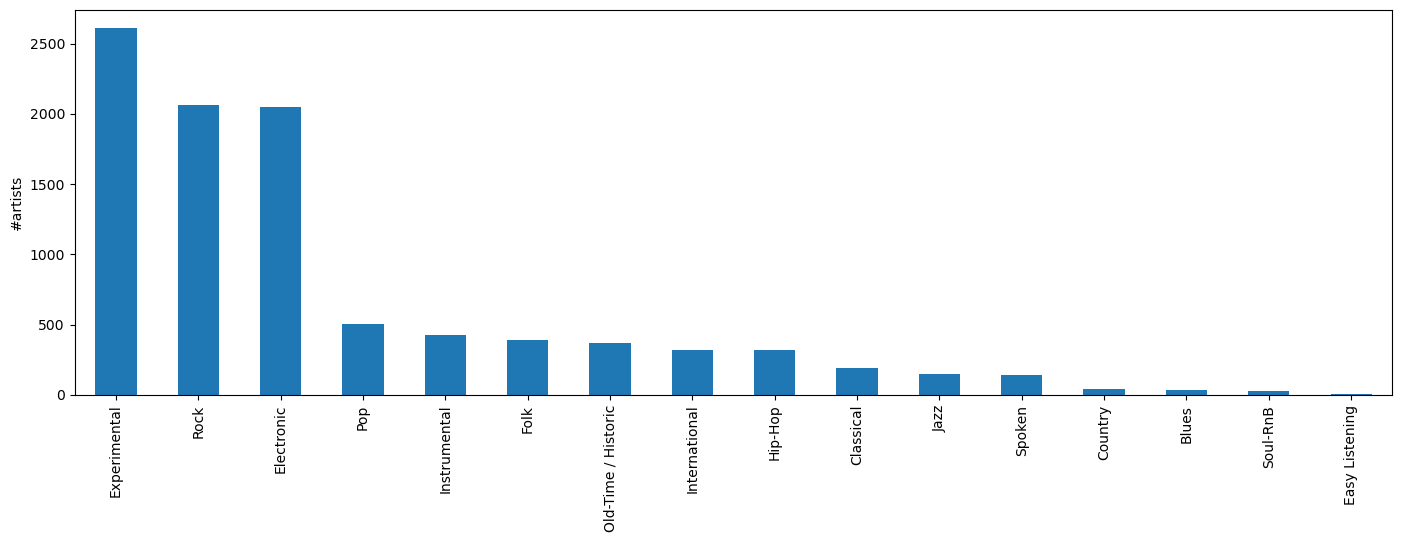

In [18]:
counts = pd.Series(index=genres.loc[genres['parent'] == 0, 'title'].values, name='#artists', dtype=np.float64)
for genre in counts.index:
    counts[genre] = len(tracks.loc[tracks['track', 'genre_top'] == genre, ('artist', 'id')].unique())
counts.sort_values(ascending=False).plot.bar()
plt.ylabel('#artists')

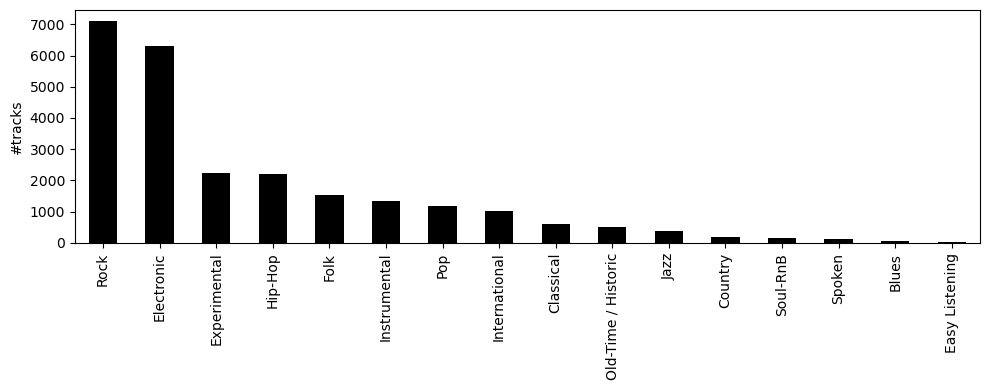

In [30]:
# Number of tracks per top-level genre (medium).
d = tracks[tracks['set', 'subset'] <= 'medium']
d = d['track', 'genre_top'].value_counts()
plt.figure(figsize=(10, 4)) 
d.plot.bar(color='k')
plt.ylabel('#tracks')
plt.xlabel('')
plt.tight_layout()

In [5]:
def save_melspectrogram(y, sr, save_path):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    plt.figure(figsize=(2.56, 2.56))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.savefig(save_path)
    plt.close()

Faulty audio files (not 30s long, as the others):
    https://github.com/mdeff/fma/issues/8

+ ../fma_medium/001/001486.mp3 || 0.0
+ ../fma_medium/005/005574.mp3 || 0.0
+ ../fma_medium/065/065753.mp3 || 0.0
+ ../fma_medium/080/080391.mp3 || 0.0
+ ../fma_medium/098/098558.mp3 || 0.0
+ ../fma_medium/098/098559.mp3 || 0.0
+ ../fma_medium/098/098560.mp3 || 0.0
+ ../fma_medium/098/098565.mp3 || 1.60761904762
+ ../fma_medium/098/098566.mp3 || 6.23129251701
+ ../fma_medium/098/098567.mp3 || 0.510476190476
+ ../fma_medium/098/098568.mp3 || 6.57088435374
+ ../fma_medium/098/098569.mp3 || 1.52925170068
+ ../fma_medium/098/098571.mp3 || 0.0
+ ../fma_medium/099/099134.mp3 || 0.0
+ ../fma_medium/105/105247.mp3 || 0.0
+ ../fma_medium/108/108924.mp3 || 27.3643537415
+ ../fma_medium/108/108925.mp3 || 0.0
+ ../fma_medium/126/126981.mp3 || 0.0
+ ../fma_medium/127/127336.mp3 || 0.0
+ ../fma_medium/133/133297.mp3 || 0.0
+ ../fma_medium/143/143992.mp3 || 0.0

In [5]:
labels = tracks['track', 'genre_top']
labels[1486], \
labels[5574], \
labels[65753], \
labels[80391], \
labels[98558], \
labels[98559], \
labels[98560], \
labels[98565], \
labels[98566], \
labels[98567], \
labels[98568], \
labels[98569], \
labels[98571], \
labels[99134], \
labels[105247], \
labels[108924], \
labels[108925], \
labels[126981], \
labels[127336], \
labels[133297], \
labels[143992]

('Electronic',
 'Rock',
 'Electronic',
 'Instrumental',
 'Hip-Hop',
 'Hip-Hop',
 'Hip-Hop',
 'Hip-Hop',
 'Hip-Hop',
 'Hip-Hop',
 'Hip-Hop',
 'Hip-Hop',
 'Hip-Hop',
 'Electronic',
 'Rock',
 'Rock',
 'Rock',
 'Folk',
 'Rock',
 'Experimental',
 'Rock')

In [9]:
# Generate melspectrograms:
for folder in list(os.listdir(AUDIO_PATH)):
    local_path = AUDIO_PATH + '/' + folder
    if os.path.isdir(local_path):
        for file in list(os.listdir(local_path)):
            file_path = local_path + '/' + file
            image_name = os.path.splitext(file)[0] + '.png'
            if not os.path.exists(IMAGE_PATH + '/' + folder):
                os.makedirs(IMAGE_PATH + '/' + folder)
            image_path = IMAGE_PATH + '/' + folder + '/' + image_name
            # print(image_path)

            if not os.path.exists(image_path):
                print(image_path)
                y, sr = librosa.load(file_path)
                save_melspectrogram(y, sr, image_path)

../Proiect_FMA/fma/data/fma_medium_image//124/124340.png
../Proiect_FMA/fma/data/fma_medium_image//124/124342.png
../Proiect_FMA/fma/data/fma_medium_image//124/124387.png
../Proiect_FMA/fma/data/fma_medium_image//124/124388.png
../Proiect_FMA/fma/data/fma_medium_image//124/124389.png
../Proiect_FMA/fma/data/fma_medium_image//124/124390.png
../Proiect_FMA/fma/data/fma_medium_image//124/124391.png
../Proiect_FMA/fma/data/fma_medium_image//124/124392.png
../Proiect_FMA/fma/data/fma_medium_image//124/124393.png
../Proiect_FMA/fma/data/fma_medium_image//124/124394.png
../Proiect_FMA/fma/data/fma_medium_image//124/124396.png
../Proiect_FMA/fma/data/fma_medium_image//124/124397.png
../Proiect_FMA/fma/data/fma_medium_image//124/124398.png
../Proiect_FMA/fma/data/fma_medium_image//124/124399.png
../Proiect_FMA/fma/data/fma_medium_image//124/124400.png
../Proiect_FMA/fma/data/fma_medium_image//124/124401.png
../Proiect_FMA/fma/data/fma_medium_image//124/124402.png
../Proiect_FMA/fma/data/fma_med